In [7]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Enter the directory path to analyze WAV files: /Users/ciprian/Desktop/Projects/Smart Plant Pot/Audio/Voice Recognition/Prototype 3
Average length of WAV files: 1.19 seconds
Midpoint length of WAV files: 1.16 seconds


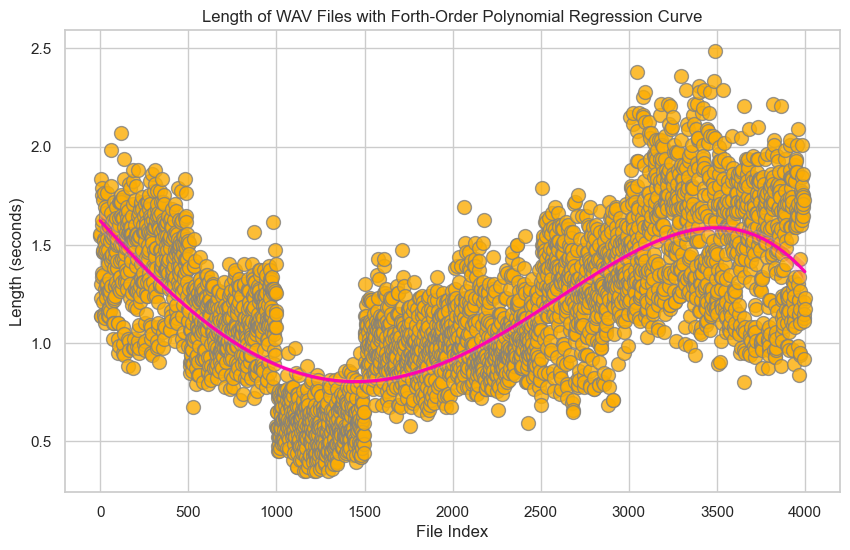

In [14]:
def find_wav_files(directory):
    """ Recursively finds all WAV files in the given directory. """
    wav_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                wav_files.append(os.path.join(root, file))
    return wav_files

def get_wav_length(file_path):
    """ Returns the length of the WAV file in seconds. """
    audio = AudioSegment.from_wav(file_path)
    return len(audio) / 1000.0

def analyze_wav_files(directory):
    """ Analyzes WAV files to get average length and plot lengths. """
    wav_files = find_wav_files(directory)
    lengths = [get_wav_length(file) for file in wav_files]
    
    if not lengths:
        print("No WAV files found in the directory.")
        return

    average_length = sum(lengths) / len(lengths)
    midpoint_length = sorted(lengths)[len(lengths) // 2]

    print(f"Average length of WAV files: {average_length:.2f} seconds")
    print(f"Midpoint length of WAV files: {midpoint_length:.2f} seconds")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")  # Modern, clean style with grid background
    x_values = np.arange(len(lengths))  # Convert range to numpy array
    sns.regplot(x=x_values, y=lengths, scatter_kws={'color': '#fcad03', 's': 100, 'edgecolor': 'gray'}, line_kws={'color': '#fc03b1'}, order=4)
    plt.title('Length of WAV Files with Forth-Order Polynomial Regression Curve')
    plt.xlabel('File Index')
    plt.ylabel('Length (seconds)')
    plt.show()

# User input for directory path
directory_path = input("Enter the directory path to analyze WAV files: ")
analyze_wav_files(directory_path)